In [5]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("milk-production.csv")
df.head()

,Month,Milk Production
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0


In [6]:
df.columns = ['Month','Milk in pounds per cow']
df.head()

,Month,Milk in pounds per cow
0,1962-01-01 01:00:00,589.0
1,1962-02-01 01:00:00,561.0
2,1962-03-01 01:00:00,640.0
3,1962-04-01 01:00:00,656.0
4,1962-05-01 01:00:00,727.0


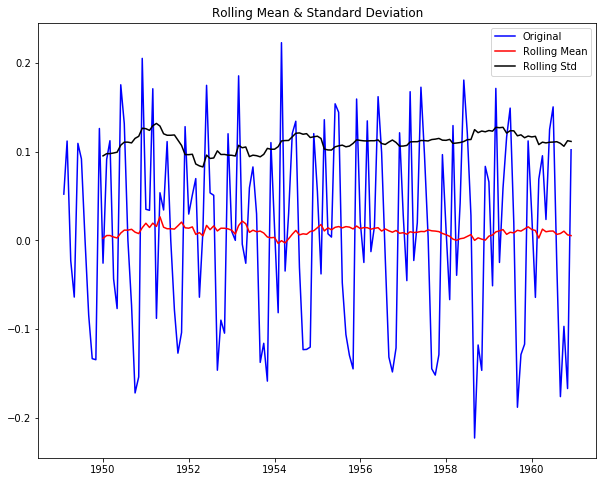

Result of Dicky=Fuller Test
Test Statistic           -2.717131
p-value                   0.071121
#Lags Used               14.000000
#Observations Used      128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


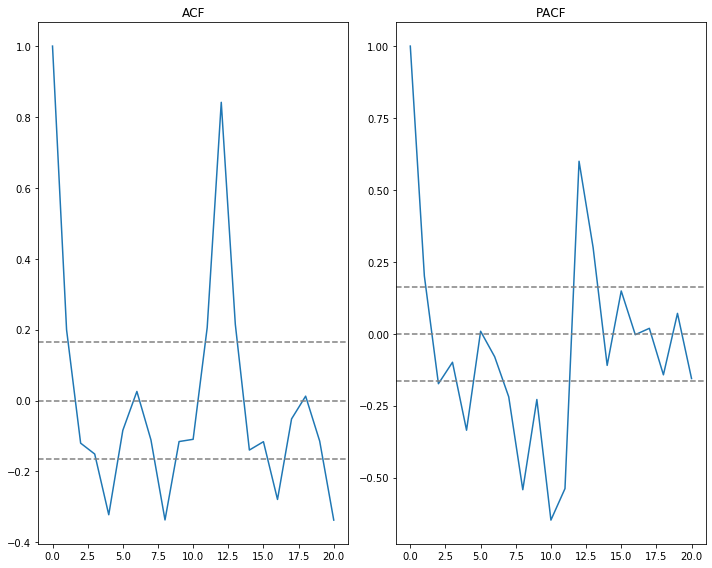

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


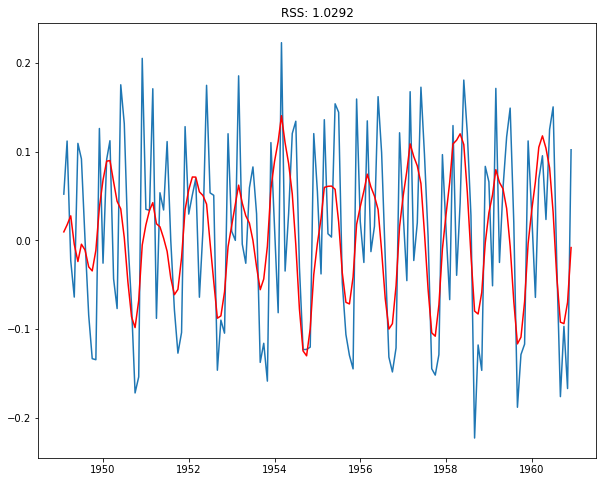

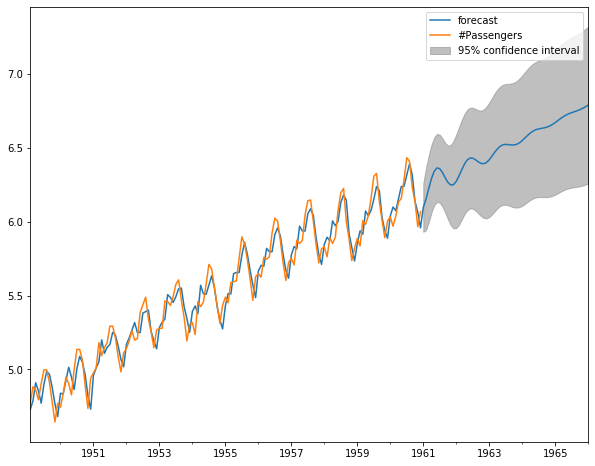

[1.08746262 1.11348487 1.12264437 1.12415063 1.12415874 1.12461435
 1.12481941 1.12500461 1.12776932 1.13582632 1.14879044 1.16321523
 1.17536428 1.18334353 1.18740859 1.18900855 1.18956454 1.18988252
 1.19041521 1.1917625  1.1946837  1.19956286 1.2059434  1.21268137
 1.21858754 1.22299942 1.22591872 1.22776852 1.22906372 1.23024087
 1.23166844 1.23368208 1.23651561 1.24016543 1.24433567 1.2485496
 1.25236109 1.25552391 1.25803133 1.26004568 1.26179871 1.26352488
 1.26543141 1.26767323 1.27031561 1.27330436 1.2764767  1.27962052
 1.28255292 1.28517679 1.28749353 1.28957961 1.29155009 1.29352659
 1.29561295 1.29787524 1.30032662 1.3029239  1.30558209 1.30820348]


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (10, 8)
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA


def load_dataset():
    dataset = pd.read_csv('airpassengers.csv')
    # parse strings to datetime type
    dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
    indexed_data = dataset.set_index(['Month'])
    
    return indexed_data

def plot_acf_dcf():
    # ACF and PACF plots

    lag_acf = acf(dataset_log_first_order_diff, nlags=20)
    lag_pacf = pacf(dataset_log_first_order_diff, nlags=20, method='ols')

    # Plot ACF
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(dataset_log_first_order_diff)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(dataset_log_first_order_diff)), linestyle='--', color='gray')
    plt.title('ACF')

    # Plot PACF
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(dataset_log_first_order_diff)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(dataset_log_first_order_diff)), linestyle='--', color='gray')
    plt.title('PACF')
    plt.tight_layout()
    plt.show()

def model_ARIMA(indexed_data_log_scale, dataset_log_first_order_diff):
    #ARIMA Model
    model = ARIMA(indexed_data_log_scale, order=(2, 1, 2))
    results_ARIMA = model.fit(disp=-1)
    plt.plot(dataset_log_first_order_diff)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-dataset_log_first_order_diff['#Passengers'])**2))
    plt.show()    
    return results_ARIMA

def test_stationarity(timeseries):
    
    # Determinig rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print('Result of Dicky=Fuller Test')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', '#Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


indexed_data = load_dataset()
indexed_data_log_scale = np.log(indexed_data)
dataset_log_first_order_diff = indexed_data_log_scale - indexed_data_log_scale.shift()
dataset_log_first_order_diff.dropna(inplace=True)

test_stationarity(dataset_log_first_order_diff)

plot_acf_dcf()

results_ARIMA = model_ARIMA(indexed_data_log_scale, dataset_log_first_order_diff)
results_ARIMA.plot_predict(1,204)
plt.show()
future = results_ARIMA.forecast(steps=60)
print(np.exp(future[1]))